In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline  
from scipy.stats import kurtosis, skew
from time import time



In [12]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_predict, validation_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [13]:
df= pd.read_excel(r'C:\Users\user\Desktop\DataScience_2025\loan_data2.xlsx')

In [14]:
df.head()

,age,gender,education,income,person_emp_exp,home_ownership,loan_amount,loan_intent,loan_int_rate,loan_percent_of_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [15]:
df.dtypes

age                                 int64
gender                             object
education                          object
income                              int64
person_emp_exp                      int64
home_ownership                     object
loan_amount                         int64
loan_intent                        object
loan_int_rate                     float64
loan_percent_of_income            float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [16]:
df.shape

(45000, 14)

In [17]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [18]:
df.describe()

,age,income,person_emp_exp,loan_amount,loan_int_rate,loan_percent_of_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [19]:
df.isnull().sum()

age                               0
gender                            0
education                         0
income                            0
person_emp_exp                    0
home_ownership                    0
loan_amount                       0
loan_intent                       0
loan_int_rate                     0
loan_percent_of_income            0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [20]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [21]:
df['education'].value_counts()

education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

<Figure size 1200x600 with 0 Axes>

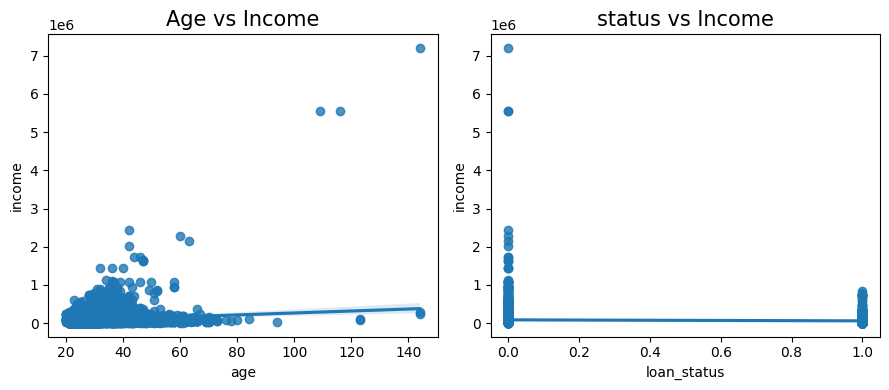

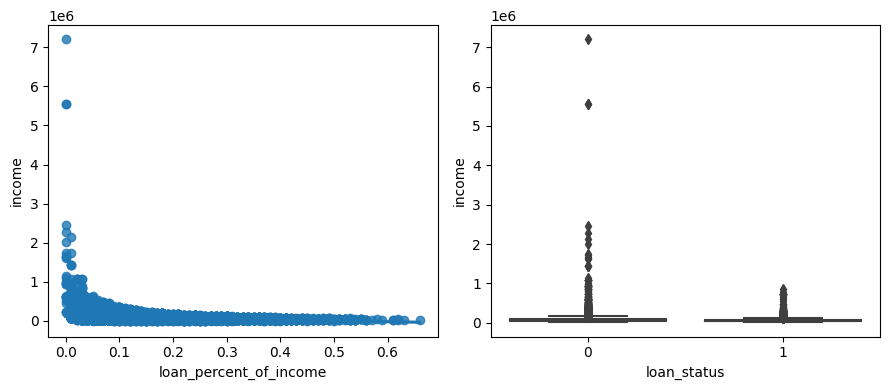

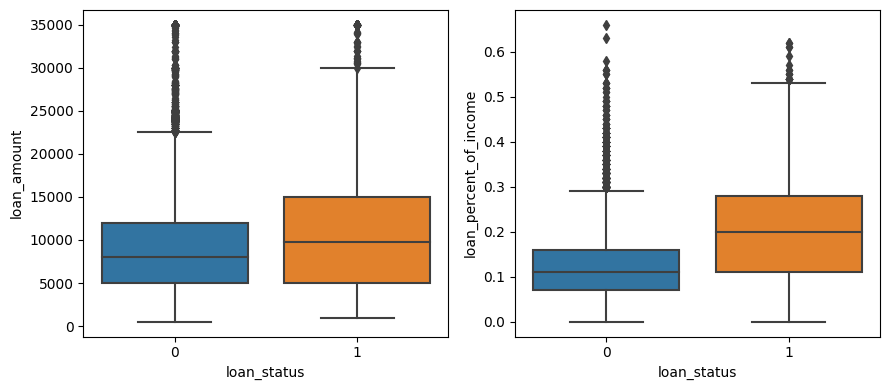

In [22]:
bigfig= plt.figure(figsize=(12,6))
(top, middle, bottom)= bigfig.subfigures(3,1, wspace=.5, hspace=.5)

# Top figures
top.subplots_adjust(left=.1, right=.9)

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(9,4))

ax1= sns.regplot(x= 'age', y= 'income', data=df, ax=ax1)
ax1.set_title('Age vs Income', size=15)

ax2= sns.regplot(x= 'loan_status', y= 'income', data=df, ax=ax2)
ax2.set_title('status vs Income', size=15)

plt.tight_layout()

# Middle figures
middle.subplots_adjust(left=.1, right=.9)

fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(9,4))
ax1= sns.regplot(x= 'loan_percent_of_income', y= 'income', data=df, ax=ax1)

ax2=sns.boxplot(x='loan_status',y= 'income', data=df, ax=ax2)

plt.tight_layout()

#Bottom figure
bottom.subplots_adjust(left=.1, right=.9)

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(9,4))

ax1= sns.boxplot(x='loan_status',y= 'loan_amount', data=df, ax=ax1)

ax2= sns.boxplot(x='loan_status',y= 'loan_percent_of_income', data=df, ax= ax2)

plt.tight_layout()


In [23]:
print( df[['income', 'loan_status']].corr())
print( df[['income', 'age']].corr())
print( df[['income', 'loan_amount']].corr())
print( df[['age', 'loan_amount']].corr())
print( df[['loan_percent_of_income', 'loan_amount']].corr())
print( df[['credit_score', 'loan_amount']].corr())
print( df[['person_emp_exp', 'loan_amount']].corr())
print( df[['loan_percent_of_income', 'loan_amount']].corr())
print( df[['loan_percent_of_income', 'income']].corr())
print( df[['loan_percent_of_income', 'loan_status']].corr())
print( df[['credit_score', 'income']].corr())
print( df[['loan_status', 'cb_person_cred_hist_length']].corr())




               income  loan_status
income       1.000000    -0.135808
loan_status -0.135808     1.000000
          income       age
income  1.000000  0.193698
age     0.193698  1.000000
              income  loan_amount
income       1.00000      0.24229
loan_amount  0.24229      1.00000
                 age  loan_amount
age          1.00000      0.05075
loan_amount  0.05075      1.00000
                        loan_percent_of_income  loan_amount
loan_percent_of_income                1.000000     0.593011
loan_amount                           0.593011     1.000000
              credit_score  loan_amount
credit_score      1.000000     0.009074
loan_amount       0.009074     1.000000
                person_emp_exp  loan_amount
person_emp_exp        1.000000     0.044589
loan_amount           0.044589     1.000000
                        loan_percent_of_income  loan_amount
loan_percent_of_income                1.000000     0.593011
loan_amount                           0.593011     1.00000

<Axes: xlabel='loan_intent', ylabel='income'>

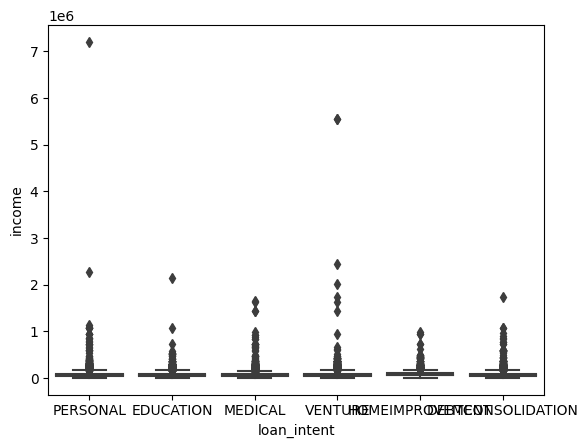

In [24]:
sns.boxplot(x='loan_intent',y= 'income', data=df)

<Axes: xlabel='previous_loan_defaults_on_file', ylabel='income'>

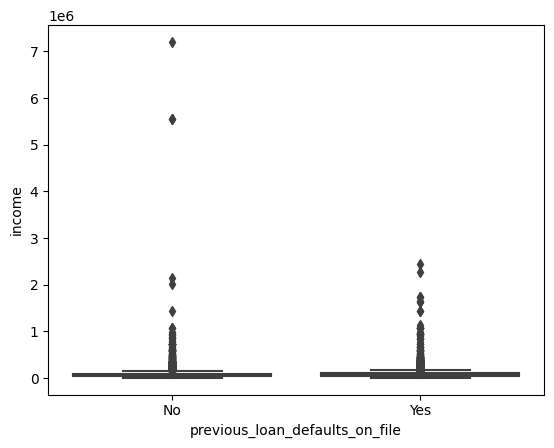

In [25]:
sns.boxplot(x='previous_loan_defaults_on_file',y= 'income', data=df)

In [26]:
df_group_based_on_intent= df[['loan_status', 'loan_intent', 'loan_amount', 'loan_percent_of_income', 'income']]

df_group_based_on_intent= df_group_based_on_intent.groupby(['loan_intent'], as_index=True).mean()
df_group_based_on_intent

,loan_status,loan_amount,loan_percent_of_income,income
loan_intent,,,,
DEBTCONSOLIDATION,0.302729,9548.333660,0.139418,80608.216935
EDUCATION,0.169562,9507.405987,0.139547,77765.025019
HOMEIMPROVEMENT,0.263015,10419.187330,0.135779,89148.745766
MEDICAL,0.278194,9137.959172,0.143425,73414.871900
PERSONAL,0.201404,9603.918432,0.138227,83030.910222
VENTURE,0.144264,9658.897429,0.140029,82571.965852


<Axes: ylabel='count'>

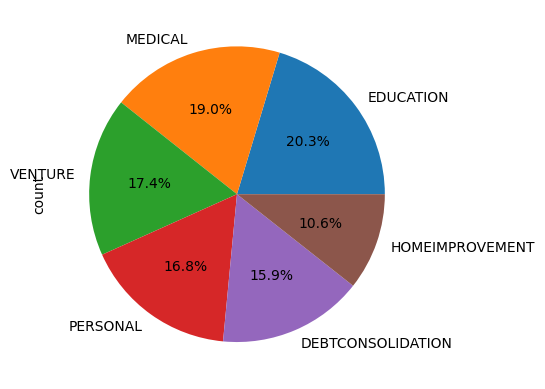

In [27]:
df['loan_intent'].value_counts().plot(kind='pie', autopct="%1.1f%%")

In [28]:
df['income_group'] = pd.qcut(df['income'], q=4, labels=['Low','Medium','High','Very High'])
df.groupby('income_group')['loan_status'].mean()

income_group
Low          0.403733
Medium       0.220514
High         0.172104
Very High    0.092533
Name: loan_status, dtype: float64

<Axes: ylabel='count'>

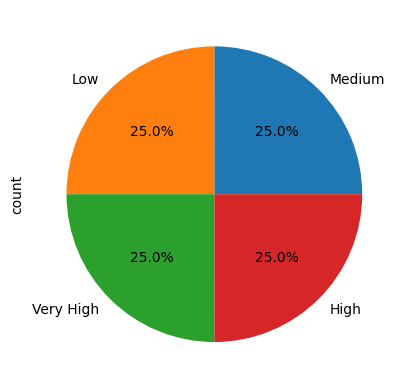

In [29]:
df['income_group'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: xlabel='age', ylabel='Density'>

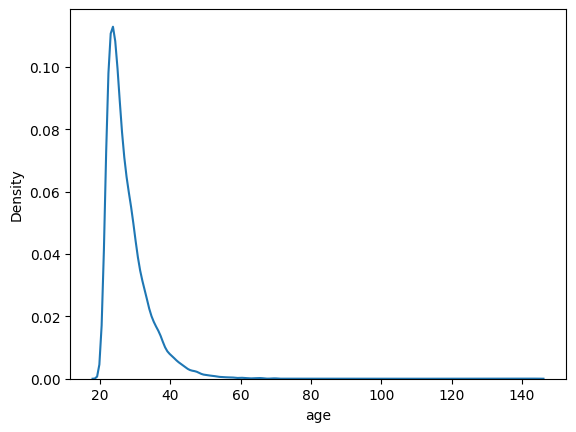

In [30]:
sns.kdeplot(data= df, x= 'age')

<Axes: ylabel='Count'>

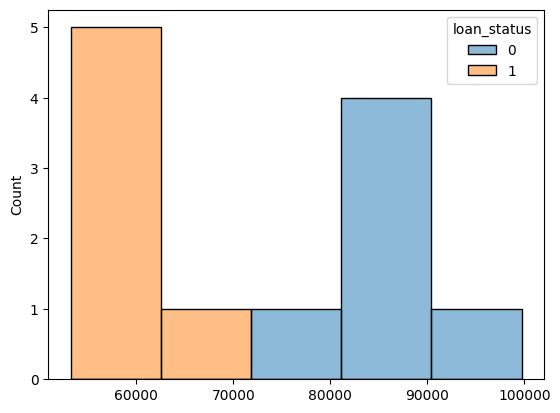

In [31]:
loan_vs_income_mean= df.pivot_table(index='loan_intent', columns= 'loan_status', values='income', aggfunc= 'mean')
sns.histplot(data=loan_vs_income_mean)

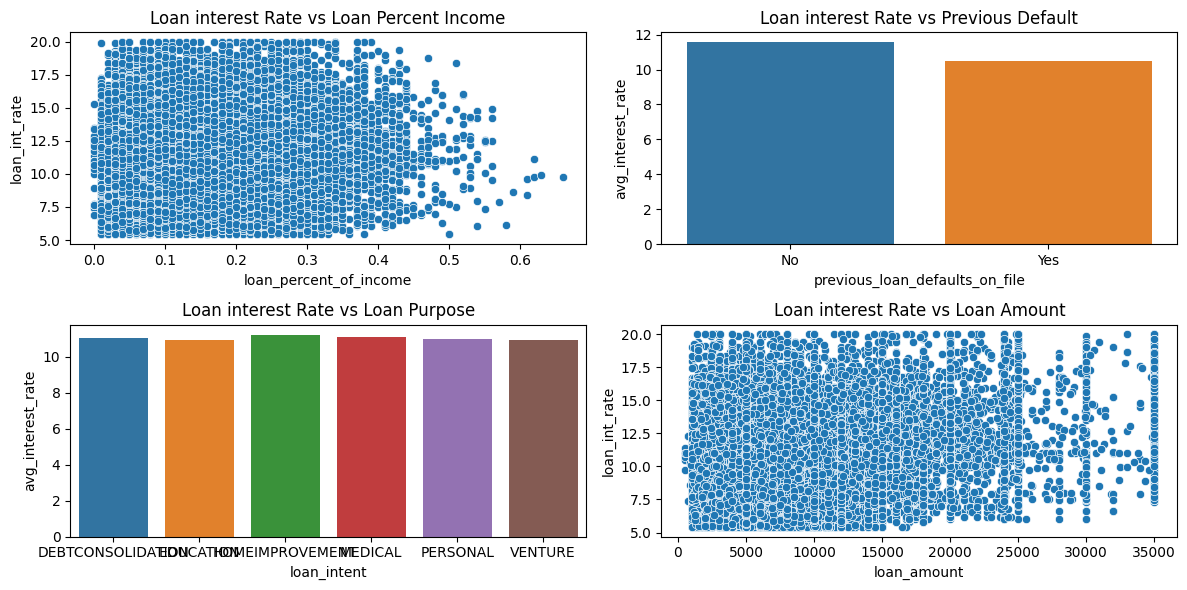

In [32]:
int_rate_default= df.groupby('previous_loan_defaults_on_file')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')

int_rate_purpose= df.groupby('loan_intent')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')
#######

## Figures
fig, ax= plt.subplots(2, 2, figsize=(12,6))

sns.scatterplot(data= df, x='loan_percent_of_income', y='loan_int_rate', ax=ax[0,0])
ax[0,0].set_title('Loan interest Rate vs Loan Percent Income')

sns.barplot(data= int_rate_default, x='previous_loan_defaults_on_file', y= 'avg_interest_rate', ax=ax[0,1])
ax[0,1].set_title('Loan interest Rate vs Previous Default')

sns.barplot(data= int_rate_purpose, x='loan_intent', y= 'avg_interest_rate', ax=ax[1,0])
ax[1,0].set_title('Loan interest Rate vs Loan Purpose')

sns.scatterplot(data= df, x='loan_amount', y='loan_int_rate')
ax[1,1].set_title('Loan interest Rate vs Loan Amount')


plt.tight_layout()

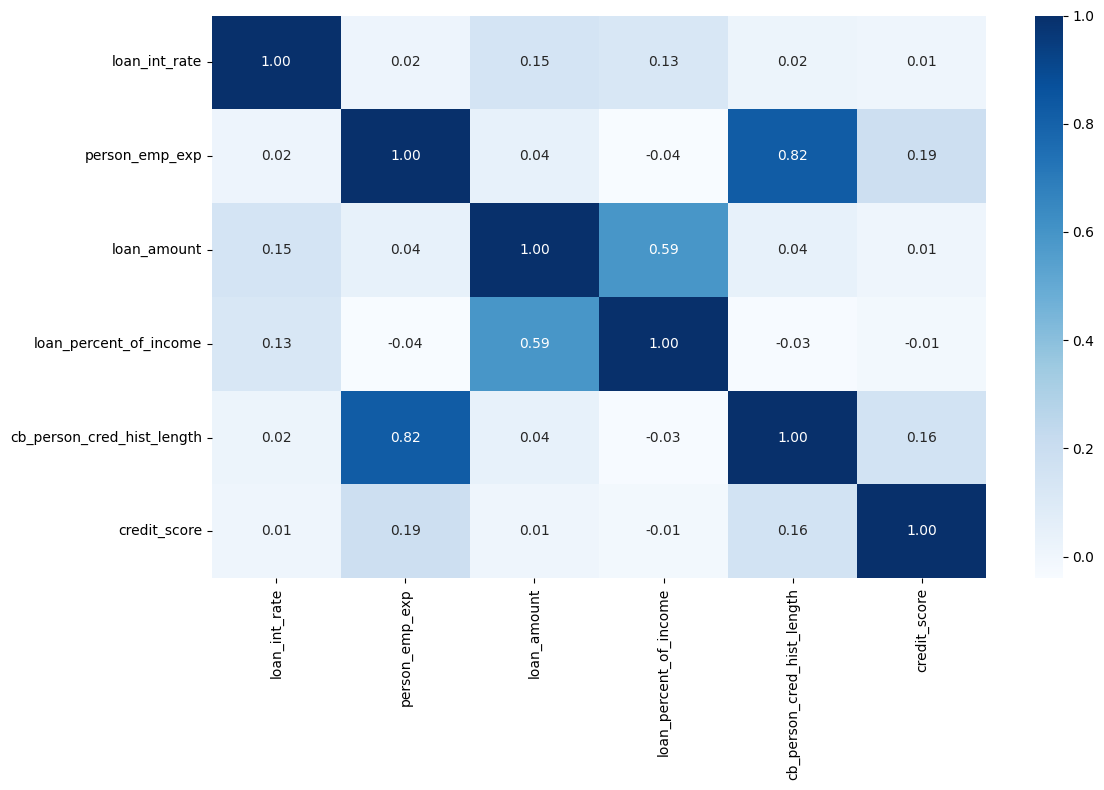

In [33]:
selected_features= ['loan_int_rate',
                    'person_emp_exp',
                    'loan_amount',
                    'loan_percent_of_income',
                    'cb_person_cred_hist_length', 
                    'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(df[selected_features].corr(method='pearson'),annot=True, fmt='.2f', cmap='Blues')

plt.tight_layout()

In [34]:
num_features_one= ['age', 'income', 'person_emp_exp']

for col in num_features_one:
    print(f"Skwness of {col}: {skew(df[col])}")
    print(f'kurtosis of {col}: {kurtosis(df[col])}\n')

Skwness of age: 2.5480690657849285
kurtosis of age: 18.64724355494631

Skwness of income: 34.13644520299569
kurtosis of income: 2398.418123917783

Skwness of person_emp_exp: 2.594830874585158
kurtosis of person_emp_exp: 19.166060676086243



<Axes: xlabel='age', ylabel='Count'>

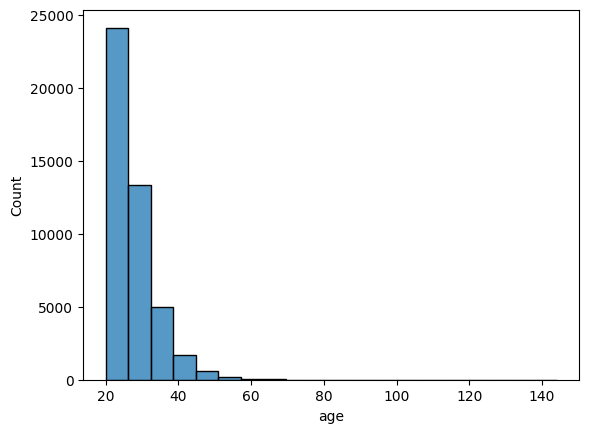

In [35]:
sns.histplot(x= 'age', data=df, bins= 20)

Outliers

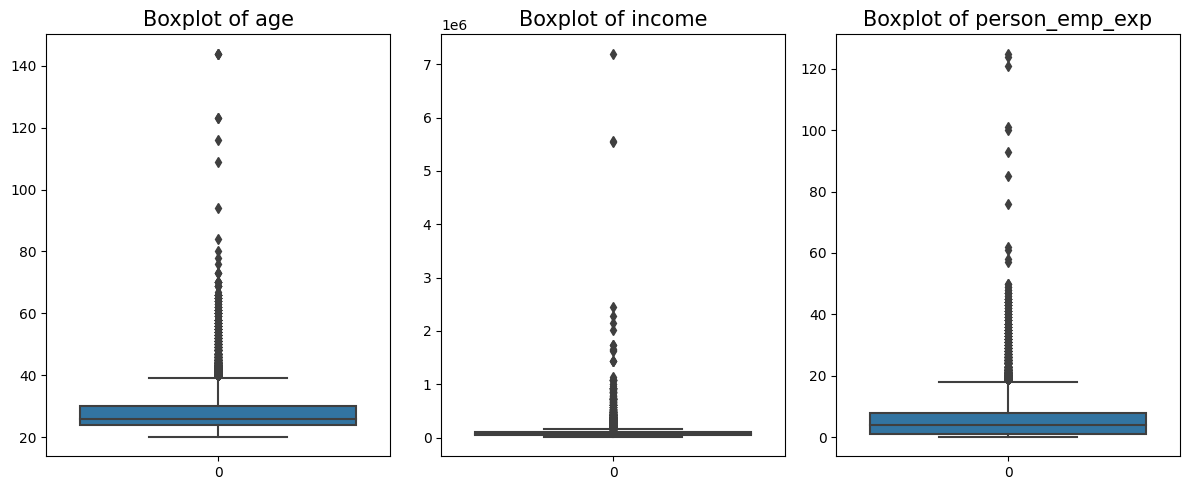

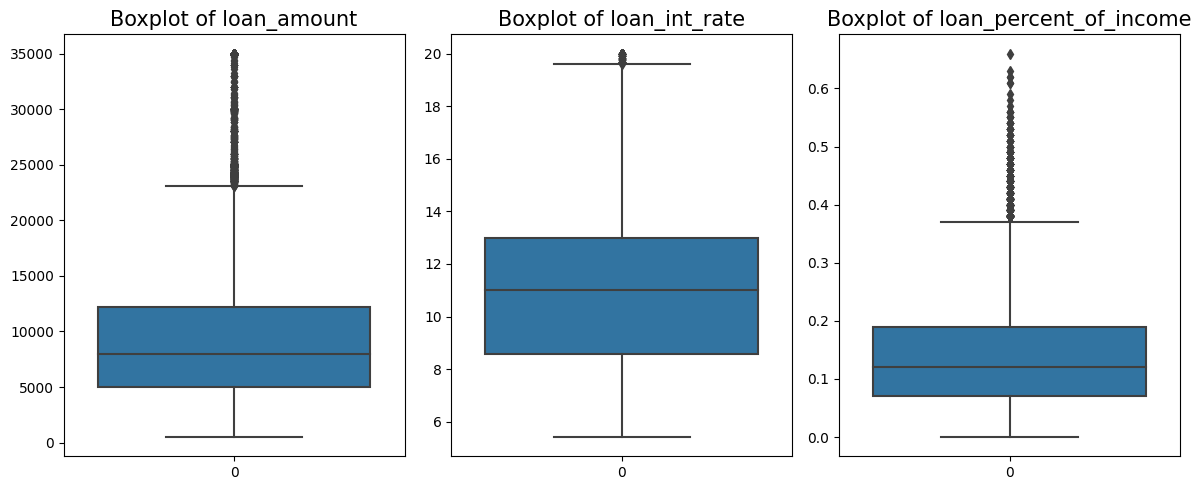

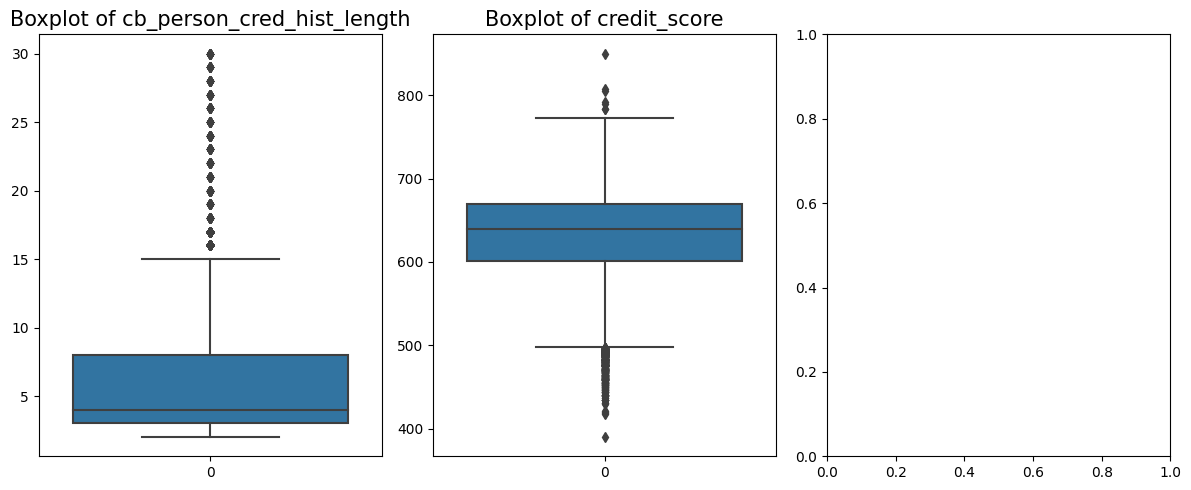

In [36]:
num_features= [col for col in df.columns if df[col].dtypes != 'O']
num_features.remove('loan_status')
num_features.remove('income_group')


def plot_boxplots(df):

    for i in range(3):

        fig, (ax1,ax2,ax3)= plt.subplots(ncols=3, figsize=(12,5))
        ax1= sns.boxplot(df[num_features[i*3]], ax=ax1) 
        ax1.set_title('Boxplot of '+str(num_features[i*3]), fontsize=15)

        ax2= sns.boxplot(df[num_features[i*3+1]], ax=ax2)
        ax2.set_title('Boxplot of '+str(num_features[i*3+1]), fontsize=15)
        if i< 2:
            ax3= sns.boxplot(df[num_features[i*3+2]], ax= ax3)
            ax3.set_title('Boxplot of '+str(num_features[i*3+2]), fontsize=15)

        plt.tight_layout()

plot_boxplots(df)        


In [37]:
def outliers_percentage(df):

    outliers_perc= []

    for k,v in df.items():
        # Colunms must be of numeric type
        if df[k].dtypes != 'O':
            q1= v.quantile(0.25)
            q3= v.quantile(0.75)
            iqr= q3 - q1
            v_col= v[(v <= q1 - 1.5 * iqr) | (v>= q3 + 1.5 * iqr)]
            prec= np.shape(v_col)[0] * 100 / np.shape(df)[0]
            out_tuple= (k, int(prec))
            outliers_perc.append(out_tuple)
            print('Column %s outliers= %.2f%%' % (k,prec))

outliers_percentage(df[num_features])

Column age outliers= 5.73%
Column income outliers= 4.93%
Column person_emp_exp outliers= 3.83%
Column loan_amount outliers= 5.22%
Column loan_int_rate outliers= 0.28%
Column loan_percent_of_income outliers= 2.00%
Column cb_person_cred_hist_length outliers= 3.04%
Column credit_score outliers= 1.04%


***Data Preprocessing***

In [38]:
def remove_outliers_iqr(df, column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)
    iqr= q3 - q1
    lower_bound= q1 - 1.5 * iqr
    upper_bound= q3 + 1.5 * iqr

    # Filter the data
    filterd_data= df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filterd_data

capped_data= df.copy()

for col in num_features:
    capped_data= remove_outliers_iqr(capped_data, col)

In [39]:
num_features

['age',
 'income',
 'person_emp_exp',
 'loan_amount',
 'loan_int_rate',
 'loan_percent_of_income',
 'cb_person_cred_hist_length',
 'credit_score']

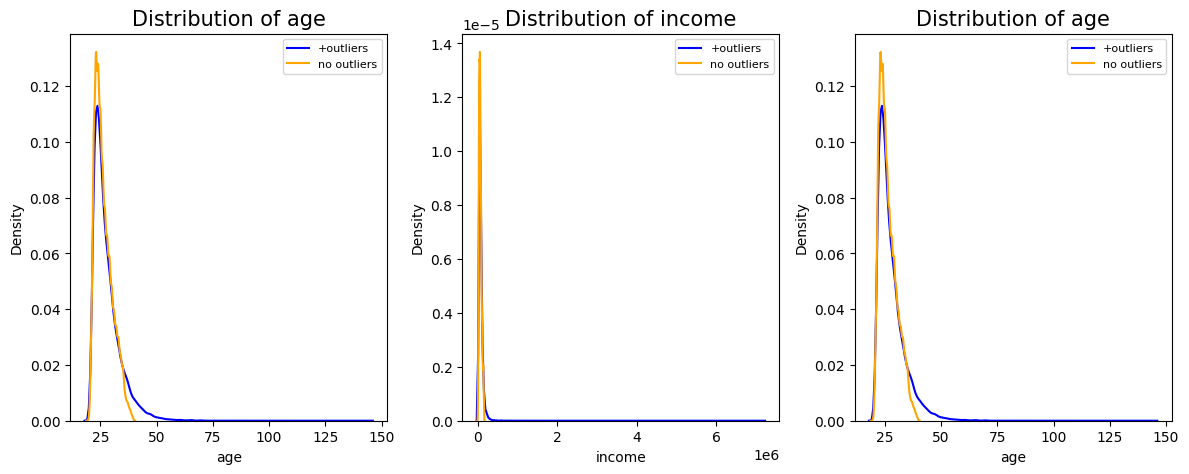

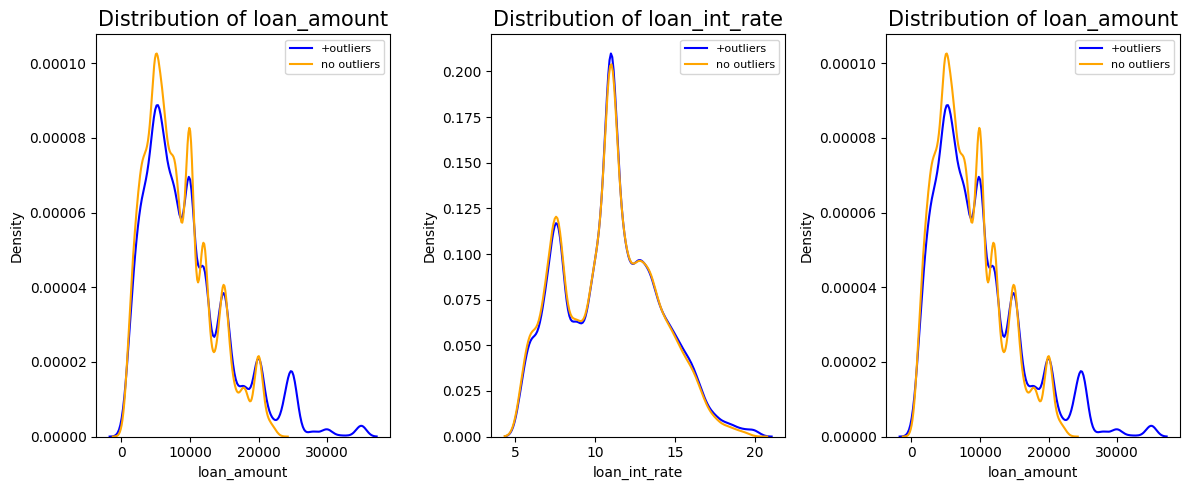

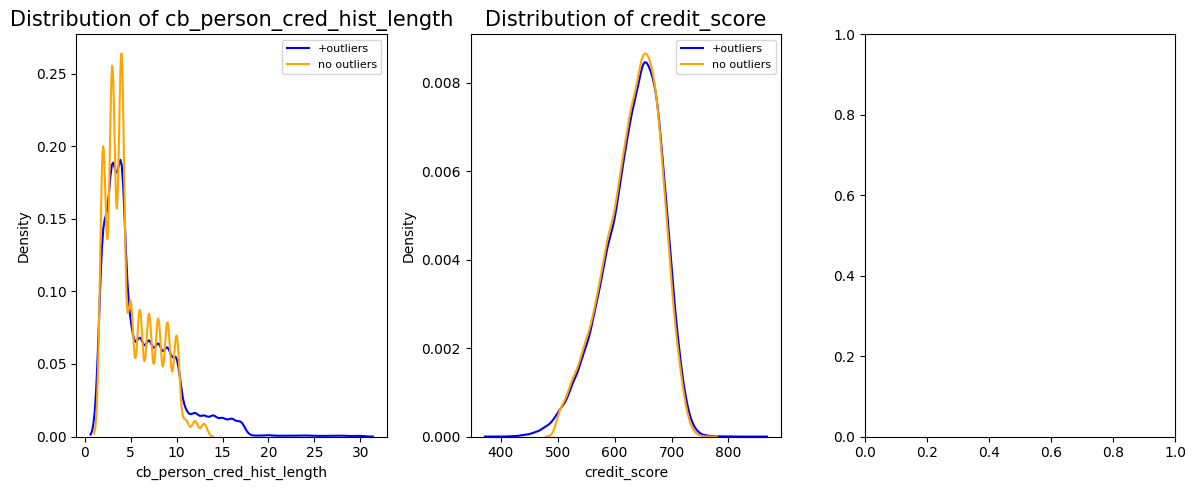

In [40]:
def plot_distrubtion(df, capped_data):

    for i in range(3):
        fig, (ax1,ax2,ax3)= plt.subplots(ncols=3, figsize= (12,5))

        ax1= sns.kdeplot(df[num_features[i*3]],ax=ax1, label= '+outliers', color= 'blue')
        ax1= sns.kdeplot(capped_data[num_features[i*3]], ax=ax1, label= 'no outliers', color= 'orange')
        ax1.set_title('Distribution of '+ str(num_features[i*3]), fontsize=15)
        ax1.legend(fontsize=8, loc= 'upper right')

        ax2= sns.kdeplot(df[num_features[i*3+1]], ax=ax2, label= '+outliers', color='blue')
        ax2= sns.kdeplot(capped_data[num_features[i*3+1]], ax=ax2, label= 'no outliers', color= 'orange')
        ax2.set_title('Distribution of '+ str(num_features[i*3+1]), fontsize=15)
        ax2.legend(fontsize=8, loc= 'upper right')

        if i <2:
            ax3= sns.kdeplot(df[num_features[i*3]], ax=ax3, label= '+outliers', color= 'blue')
            ax3= sns.kdeplot(capped_data[num_features[i*3]], ax=ax3, label= 'no outliers', color= 'orange')
            ax3.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
            ax3.legend(fontsize=8, loc='upper right')

        plt.tight_layout()

plot_distrubtion(df, capped_data)

In [41]:
for col in num_features:
    print(f'Skewness of {col}: {skew(capped_data[col])}')
    print(f'Kurtosis of {col}: {kurtosis(capped_data[col])}\n')

Skewness of age: 0.8332576383223101
Kurtosis of age: -0.00044276170210322263

Skewness of income: 0.7304305154472135
Kurtosis of income: 0.09207264087009515

Skewness of person_emp_exp: 0.8947171977883184
Kurtosis of person_emp_exp: 0.030591506491959297

Skewness of loan_amount: 0.73910383306941
Kurtosis of loan_amount: -0.08602595958290582

Skewness of loan_int_rate: 0.15695724993566545
Kurtosis of loan_int_rate: -0.5732647408021432

Skewness of loan_percent_of_income: 0.6080250250748
Kurtosis of loan_percent_of_income: -0.346650026917696

Skewness of cb_person_cred_hist_length: 0.8477000988338078
Kurtosis of cb_person_cred_hist_length: -0.2499588605626233

Skewness of credit_score: -0.4772494248773158
Kurtosis of credit_score: -0.28698076044001386



In [42]:
for col in num_features_one:
    print(f'Skewness of {col}: {skew(df[col])}')
    print(f'Kurtosis of {col}: {kurtosis(df[col])}\n')

Skewness of age: 2.5480690657849285
Kurtosis of age: 18.64724355494631

Skewness of income: 34.13644520299569
Kurtosis of income: 2398.418123917783

Skewness of person_emp_exp: 2.594830874585158
Kurtosis of person_emp_exp: 19.166060676086243

